<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/heart_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, InputLayer, Input
from tensorflow.keras.metrics import mean_squared_error, Accuracy, binary_crossentropy,categorical_crossentropy, sparse_categorical_crossentropy

In [2]:
df = pd.read_csv('/content/sample_data/Heart.txt').drop('Unnamed: 0',  axis=1)

df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df = df.replace(np.nan, df.Ca.mean())

In [4]:
df.ChestPain = pd.factorize(df.ChestPain)[0]
df.Thal = pd.factorize(df.Thal)[0]

In [5]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [6]:
X = df.iloc[:,:13].values
y = df['AHD'].values

In [7]:
y = pd.factorize(y)[0]
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [9]:
X_train.shape, y_train.shape

((212, 13), (212,))

In [10]:
X_valid, X_train = X_train[106:,] , X_train[:106,] 
y_valid, y_train = y_train[106:,], y_train[:106,]


In [11]:
X_valid.shape, y_valid.shape, y_train.shape,  X_train.shape

((106, 13), (106,), (106,), (106, 13))

In [12]:
clf = Sequential([
    # InputLayer(input_shape=(X_train.shape[1],)),
    Dense(units=128, activation='relu', name = 'layer1'),
    Dense(units=128, activation='relu', name = 'layer2'),
    Dense(units=1, activation='sigmoid', name = 'layer3'),
    
   
   
    
])

In [13]:
clf.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [14]:
history = clf.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25, verbose=2)

Epoch 1/25
4/4 - 1s - loss: 0.7036 - accuracy: 0.4811 - val_loss: 0.6562 - val_accuracy: 0.6792
Epoch 2/25
4/4 - 0s - loss: 0.5870 - accuracy: 0.7830 - val_loss: 0.5747 - val_accuracy: 0.7736
Epoch 3/25
4/4 - 0s - loss: 0.5099 - accuracy: 0.8302 - val_loss: 0.5125 - val_accuracy: 0.8019
Epoch 4/25
4/4 - 0s - loss: 0.4498 - accuracy: 0.8679 - val_loss: 0.4683 - val_accuracy: 0.8113
Epoch 5/25
4/4 - 0s - loss: 0.4013 - accuracy: 0.8962 - val_loss: 0.4385 - val_accuracy: 0.8208
Epoch 6/25
4/4 - 0s - loss: 0.3677 - accuracy: 0.8868 - val_loss: 0.4145 - val_accuracy: 0.8302
Epoch 7/25
4/4 - 0s - loss: 0.3387 - accuracy: 0.8962 - val_loss: 0.4029 - val_accuracy: 0.8302
Epoch 8/25
4/4 - 0s - loss: 0.3174 - accuracy: 0.9057 - val_loss: 0.3986 - val_accuracy: 0.8302
Epoch 9/25
4/4 - 0s - loss: 0.3011 - accuracy: 0.9057 - val_loss: 0.3897 - val_accuracy: 0.8208
Epoch 10/25
4/4 - 0s - loss: 0.2862 - accuracy: 0.9245 - val_loss: 0.3817 - val_accuracy: 0.8302
Epoch 11/25
4/4 - 0s - loss: 0.2694 - a

In [15]:
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               1792      
_________________________________________________________________
layer2 (Dense)               (None, 128)               16512     
_________________________________________________________________
layer3 (Dense)               (None, 1)                 129       
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________


In [16]:
pred = clf.predict(X_test)

In [17]:
pred[:10]

array([[1.5494227e-04],
       [8.9702445e-01],
       [7.5826740e-01],
       [7.9315543e-01],
       [1.2215176e-01],
       [1.9255593e-01],
       [9.5708704e-01],
       [4.5499820e-01],
       [9.8461556e-01],
       [3.0737093e-01]], dtype=float32)

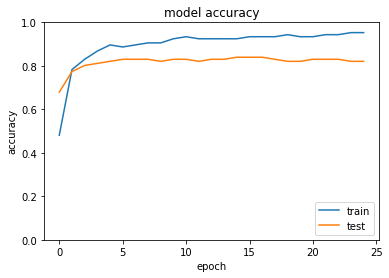

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='lower right');

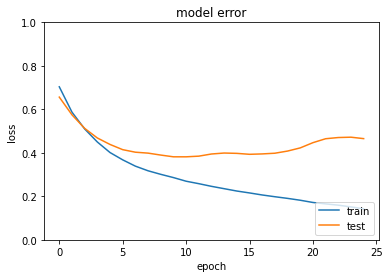

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='lower right');

In [20]:
history.params

{'epochs': 25, 'steps': 4, 'verbose': 2}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

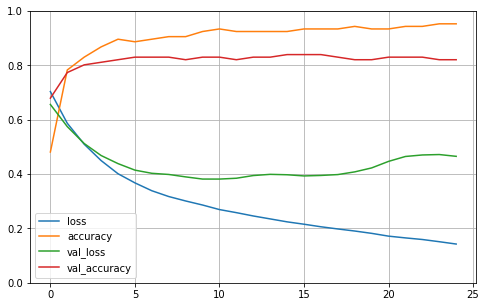

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, roc_curve

In [26]:
bin_predictions = tf.round(pred).numpy().flatten()

In [27]:
print(classification_report(y_test, bin_predictions))

              precision    recall  f1-score   support

           0       0.64      0.79      0.70        47
           1       0.70      0.52      0.60        44

    accuracy                           0.66        91
   macro avg       0.67      0.65      0.65        91
weighted avg       0.67      0.66      0.65        91



In [28]:
cnf_matrix = confusion_matrix(y_test, bin_predictions)
cnf_matrix

array([[37, 10],
       [21, 23]])

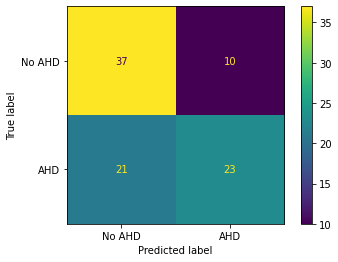

In [29]:
disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['No AHD', 'AHD'])

disp = disp.plot(include_values=True,
                 cmap='viridis', xticks_rotation='horizontal')


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [31]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

lrPred = lr.predict(X_test)

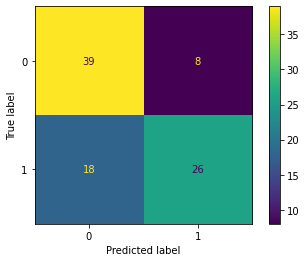

In [32]:
cm = confusion_matrix(y_test, lrPred)

ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot()

In [33]:
print(classification_report(y_test,  lrPred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        47
           1       0.76      0.59      0.67        44

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



In [34]:
rf = RandomForestClassifier(random_state=1)

rf.fit(X_train, y_train)

rfPred = rf.predict(X_test)

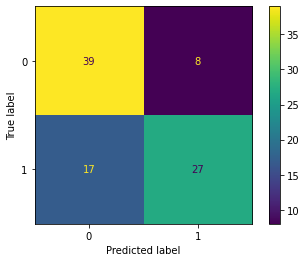

In [35]:
rf_cm = confusion_matrix(y_test, rfPred)

ConfusionMatrixDisplay(rf_cm, display_labels=[0, 1]).plot()

In [36]:
print(classification_report(y_test, rfPred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        47
           1       0.77      0.61      0.68        44

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



In [37]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [38]:
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [39]:
parameters = {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': [0, 1, 2], 'min_samples_split':[2, 3, 4] }

grid_rf = GridSearchCV(rf, param_grid=parameters, cv=cv, scoring= 'accuracy', n_jobs=-1)

rf_result = grid_rf.fit(X_train, y_train)

In [40]:
print('The best parameters of the model is: ', rf_result.best_params_)
print()
print('-'*100)
print('The best score of the model is: ', rf_result.best_score_)
print()
print('-'*100)
print('The best estimator of the model is: ', rf_result.best_estimator_)
print()
print('-'*100)

The best parameters of the model is:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 200}

----------------------------------------------------------------------------------------------------
The best score of the model is:  0.8290909090909091

----------------------------------------------------------------------------------------------------
The best estimator of the model is:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

--------------------------------------------

In [41]:
bc = BaggingClassifier(base_estimator=rf)

bc.fit(X_train, y_train)

bcPred = bc.predict(X_test)

In [42]:
print(classification_report(y_test, bcPred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        47
           1       0.76      0.64      0.69        44

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



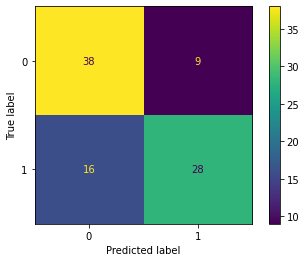

In [43]:
cm_bc = confusion_matrix(y_test, bcPred)
ConfusionMatrixDisplay(cm_bc, display_labels=[0, 1]).plot()

In [44]:
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

gbPred = gb.predict(X_test)

In [45]:
print(classification_report(y_test, gbPred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        47
           1       0.74      0.64      0.68        44

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



In [49]:
parameters = {'n_estimators': [100, 200, 300], 'loss': ['deviance', 'exponential'], 'learning_rate': [0.001, 0.01, 0.1], 'criterion':['friedman_mse', 'mse', 'mae'] }

grid_gb = GridSearchCV(gb, param_grid=parameters, cv=cv, scoring= 'accuracy', n_jobs=-1)

gb_result = grid_gb.fit(X_train, y_train)

In [50]:
print('The best parameters of the model is: ', gb_result.best_params_)
print()
print('-'*100)
print('The best score of the model is: ', gb_result.best_score_)
print()
print('-'*100)
print('The best estimator of the model is: ', gb_result.best_estimator_)
print()
print('-'*100)

The best parameters of the model is:  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'n_estimators': 300}

----------------------------------------------------------------------------------------------------
The best score of the model is:  0.7899999999999999

----------------------------------------------------------------------------------------------------
The best estimator of the model is:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.

In [58]:
y_pred_gb = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [62]:
from sklearn.metrics import auc

rf_auc = auc(fpr_rf, tpr_rf)
gb_auc = auc(fpr_gb, tpr_gb)

Text(0.5, 1.0, 'ROC Curves')

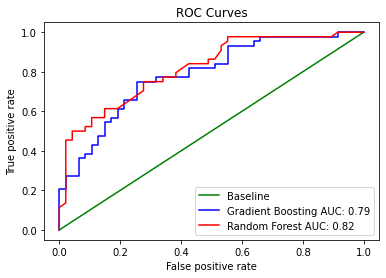

In [83]:
plt.plot([0, 1], [0, 1], color='g', linestyle='-', label='Baseline')
plt.plot(fpr_gb, tpr_gb, color = 'b', label='Gradient Boosting AUC: {:0.2f}'.format(gb_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr_rf, tpr_rf, color = 'r', label='Random Forest AUC: {:0.2f}'.format(rf_auc))
plt.legend(loc = 'best')
plt.title('ROC Curves')